In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
data_path = './data/train/'

In [5]:
train = pd.read_csv(data_path + 'train_ratings.csv')
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [5]:
train

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [6]:
train.nunique()

user      31360
item       6807
time    5074973
dtype: int64

In [7]:
train['user'].nunique()

31360

In [8]:
train['item'].nunique()

6807

### 유저가 영화를 중복으로 본 기록이 있는지 확인하기

In [9]:
sum(train[['user', 'item']].duplicated())

0

### 유저당 본 영화 개수

In [10]:
train['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

<AxesSubplot: >

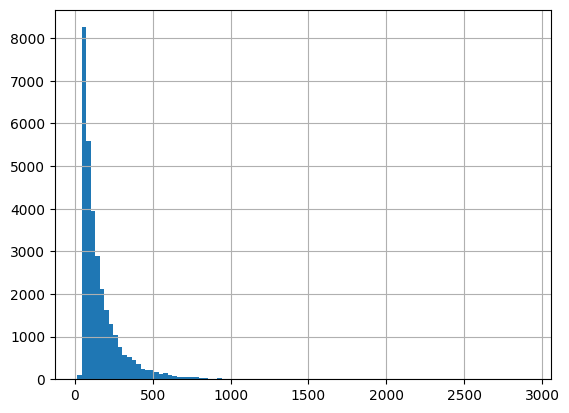

In [11]:
train['user'].value_counts()[:].hist(bins=100)

<AxesSubplot: >

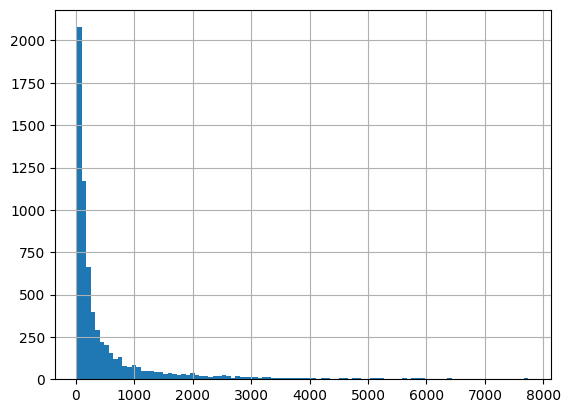

In [12]:
train['item'].value_counts()[100:].hist(bins=100)

In [13]:
import datetime

train['year'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).year)
train['month'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).month)
train['day'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).day)
train['hour'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).hour)
train['minute'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).minute)
train['second'] = train['time'].apply(lambda x: datetime.datetime.fromtimestamp(x).second)


train['year'] = train['year'].astype('int')
train['month'] = train['month'].astype('int')
train['day'] = train['day'].astype('int')
train['hour'] = train['hour'].astype('int')
train['minute'] = train['minute'].astype('int')
train['second'] = train['second'].astype('int')

In [14]:
train.sample(5)

,user,item,time,year,month,day,hour,minute,second
3669609,97809,8195,1213160083,2008,6,11,4,54,43
1004816,26447,8368,1348432154,2012,9,23,20,29,14
1411234,37192,1148,1141976873,2006,3,10,7,47,53
3293835,87729,6377,1171099686,2007,2,10,9,28,6
5096552,136954,778,1114708990,2005,4,28,17,23,10


<AxesSubplot: >

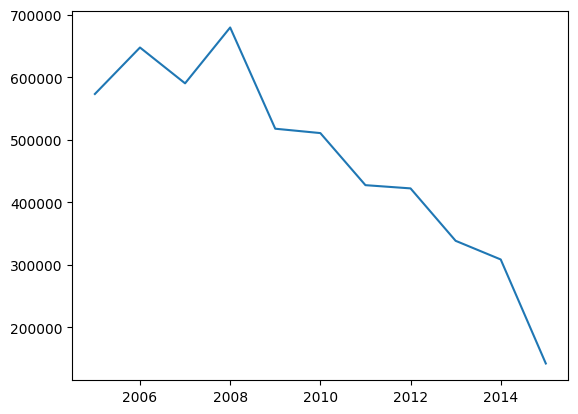

In [15]:
train['year'].value_counts().sort_index().plot()

<AxesSubplot: >

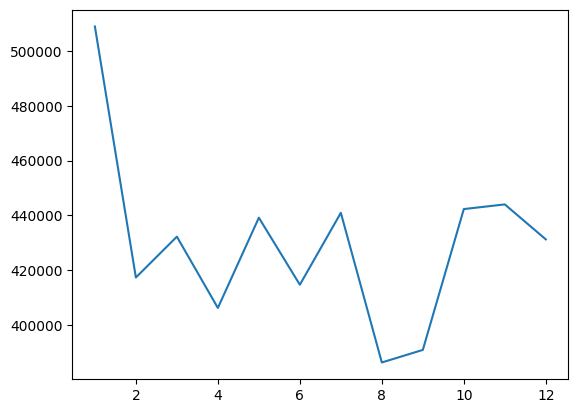

In [16]:
train['month'].value_counts().sort_index().plot()

<AxesSubplot: >

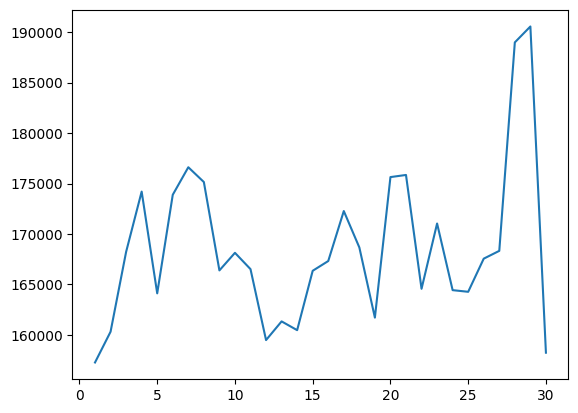

In [17]:
train['day'].value_counts().sort_index()[:-1].plot()

<AxesSubplot: >

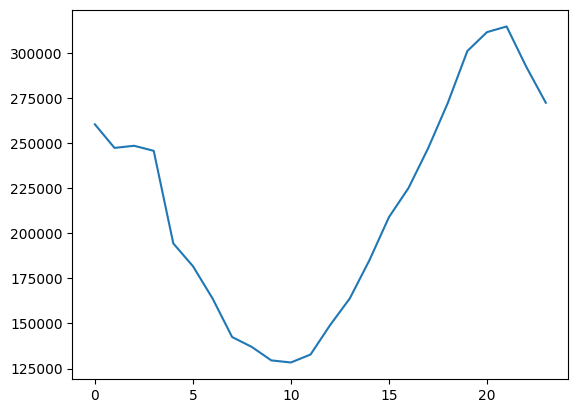

In [18]:
train['hour'].value_counts().sort_index().plot()

특정 시간에 영화를 본 게 많은건 확실히 일이나 학교 등에서 집으로 돌아와서 영화를 보기 때문인 것 같다.<br>
추후 영화 개봉년도, 개봉월과 그 달에 영화를 본 사람 수를 비교해보기

In [19]:
print('영화 개수 :', train['item'].nunique())
print('연도 기록 개수:', year_data.shape[0])
print('작가 기록 개수:', writer_data.shape[0])
print('제목 기록 개수:', title_data.shape[0])
print('감독 기록 개수:', director_data.shape[0])
print('장르 기록 개수:', genre_data.shape[0])

영화 개수 : 6807
연도 기록 개수: 6799
작가 기록 개수: 11306
제목 기록 개수: 6807
감독 기록 개수: 5905
장르 기록 개수: 15933


sub 데이터들은 item, 데이터명 형태로 되어 있음.

In [20]:
print('작가가 있는 영화 개수:',writer_data['item'].nunique())
print('장르가 있는 영화 개수:',genre_data['item'].nunique())

작가가 있는 영화 개수: 5648
장르가 있는 영화 개수: 6807


즉 제목과 장르는 모든 영화에 대해 기록되어 있지만<br>
연도(8개), 작가(1159개), 감독 (902개)는 비어있는 게 있다.

In [21]:
title_data[title_data['title'].duplicated()]

,item,title
1926,64997,War of the Worlds (2005)


In [22]:
title_data[title_data['title'] == 'War of the Worlds (2005)']

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


중복인 게 있어서 감독과 작가, 장르를 확인해봤다.

In [23]:
director_data[director_data['item'] == 34048]

,item,director
384,34048,nm0000229


In [24]:
director_data[director_data['item'] == 64997]

,item,director


In [25]:
writer_data[writer_data['item'] == 34048]

,item,writer
4527,34048,nm0295264
6221,34048,nm0462895
10154,34048,nm0920229


In [26]:
writer_data[writer_data['item'] == 64997]

,item,writer
10158,64997,nm0920229


In [27]:
genre_data[genre_data['item'] == 34048]

,item,genre
1001,34048,Action
1002,34048,Adventure
1003,34048,Sci-Fi
1004,34048,Thriller


In [28]:
genre_data[genre_data['item'] == 64997]

,item,genre
4735,64997,Action
4736,64997,Sci-Fi


작가와 장르가 겹치고, 2005년에 나온 War of the Worlds라는 영화는 하나뿐이므로(스필버그 작) 같은 영화로 치는 것이 맞을 것 같다.

아이템 자리수 자체에 대해서는 진명이가 하고 있으니

한 사람의 경향 파악

In [11]:
director_df = pd.merge(train, director_data, on=['item'])
genre_df = pd.merge(train, genre_data, on=['item'])
director_genre_df = pd.merge(director_data, genre_data, on=['item'])



<AxesSubplot: >

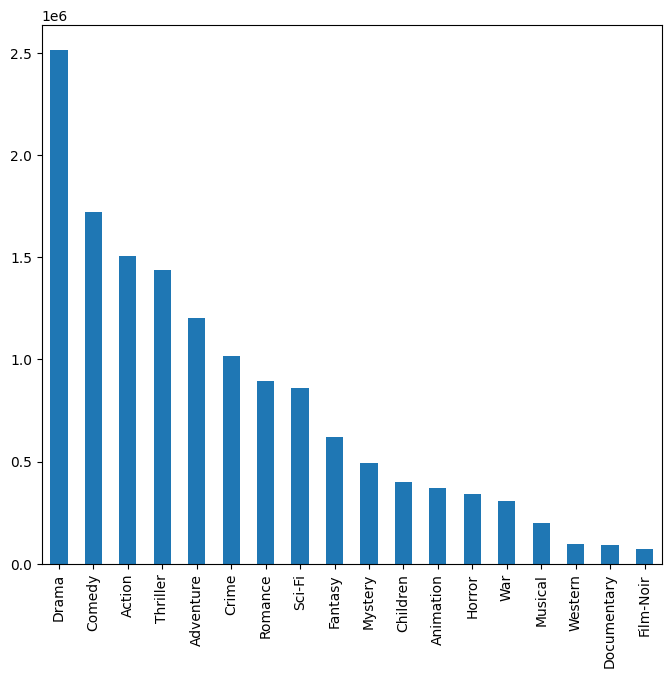

In [38]:
genre_df['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))

In [13]:
director_genre_df

,item,director,genre
0,1237,nm0000005,Drama
1,5147,nm0000005,Drama
2,7327,nm0000005,Drama
3,2068,nm0000005,Drama
4,2068,nm0000005,Fantasy
...,...,...,...
14257,58376,nm2879822,Documentary
14258,58376,nm2879822,War
14259,65225,nm2879822,Documentary
14260,55768,nm9054338,Animation


<AxesSubplot: >

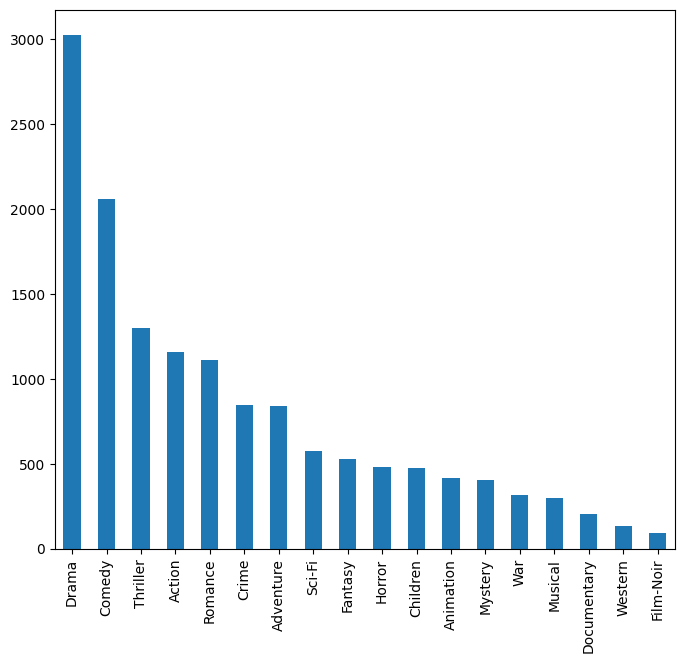

In [ ]:
directorsgenre = director_genre_df.groupby(['director', 'genre'])